# Feature Engineering
This notebook contains the code for feature engineering. This notebook should/does not include any functions for cleaning or analysing the data set. 

Made by: Yari Anrango

Date: 16/04/23


Based on the correlation plot in the previous step, it appears that mood only has some correlation with valence. We will try to do some alterations to improve this.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./knn_imputed_data.csv', index_col = 'time' ,parse_dates=['time'])

In [148]:
data.head()

,Unnamed: 0,id,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,circumplex.arousal,circumplex.valence,mood
time,,,,,,,,,,,,,,,,,,,,,
2014-03-21,0,AS14.01,0.243295,0.447549,0.434987,0.119466,0.039790,0.0,0.035532,0.065960,...,0.326282,0.000000,0.272236,0.000000,0.193548,0.856057,0.000000,0.550,0.420290,0.533333
2014-03-22,1,AS14.01,0.328776,0.117903,0.343701,0.011066,0.016927,0.0,0.000000,0.027001,...,0.014135,0.000000,0.065417,0.000000,0.096774,0.316896,0.058824,0.650,0.516908,0.566667
2014-03-23,2,AS14.01,0.185734,0.175857,0.338892,0.011188,0.034858,0.0,0.000000,0.020035,...,0.000000,0.000000,0.016733,0.092875,0.000000,0.349480,0.000000,0.550,0.613527,0.633333
2014-03-24,3,AS14.01,0.164390,0.169103,0.580359,0.115851,0.027391,0.0,0.000632,0.018311,...,0.155037,0.000000,0.095643,0.000000,0.322581,0.776345,0.000000,0.600,0.355878,0.500000
2014-03-25,4,AS14.01,0.204806,0.168532,0.618168,0.008088,0.034578,0.0,0.000000,0.049196,...,0.000000,0.088728,0.123966,0.000000,0.000000,0.848311,0.058824,0.625,0.516908,0.625000


In [162]:
data = data.drop('Unnamed: 0', axis = 1)

In [66]:
delta = data.index.max() - data.index.min()
delta

Timedelta('96 days 00:00:00')

In [67]:
data['id'].unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

Make sure that the dataframe is sorted correctly

In [4]:
data = data.sort_values(by = ['id','time'])
data.head()

,Unnamed: 0,id,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,circumplex.arousal,circumplex.valence,mood
time,,,,,,,,,,,,,,,,,,,,,
2014-03-21,0,AS14.01,0.243295,0.447549,0.434987,0.119466,0.039790,0.0,0.035532,0.065960,...,0.326282,0.000000,0.272236,0.000000,0.193548,0.856057,0.000000,0.550,0.420290,0.533333
2014-03-22,1,AS14.01,0.328776,0.117903,0.343701,0.011066,0.016927,0.0,0.000000,0.027001,...,0.014135,0.000000,0.065417,0.000000,0.096774,0.316896,0.058824,0.650,0.516908,0.566667
2014-03-23,2,AS14.01,0.185734,0.175857,0.338892,0.011188,0.034858,0.0,0.000000,0.020035,...,0.000000,0.000000,0.016733,0.092875,0.000000,0.349480,0.000000,0.550,0.613527,0.633333
2014-03-24,3,AS14.01,0.164390,0.169103,0.580359,0.115851,0.027391,0.0,0.000632,0.018311,...,0.155037,0.000000,0.095643,0.000000,0.322581,0.776345,0.000000,0.600,0.355878,0.500000
2014-03-25,4,AS14.01,0.204806,0.168532,0.618168,0.008088,0.034578,0.0,0.000000,0.049196,...,0.000000,0.088728,0.123966,0.000000,0.000000,0.848311,0.058824,0.625,0.516908,0.625000


As for the attributes, we will use some form of aggregation to make more common algorithms work with the data set. In this case we will calculate the moving average for some k days per attribute. As for now, we use k = 5 days for the aggregation. We will also remove the mood from this calculation because otherwise the model will predict the average mood of the past 5 days and not the mood of the day chosen.

In [5]:
mood = data[['id','mood']]
data = data.drop('mood', axis = 1)
data_agg = data.groupby('id').rolling('5D').mean()
data_agg.head()

Unnamed: 0  activity  appCat.builtin  \
id      time                                               
AS14.01 2014-03-21         0.0  0.243295        0.447549   
        2014-03-22         0.5  0.286036        0.282726   
        2014-03-23         1.0  0.252602        0.247103   
        2014-03-24         1.5  0.230549        0.227603   
        2014-03-25         2.0  0.225400        0.215789   

                    appCat.communication  appCat.entertainment  \
id      time                                                     
AS14.01 2014-03-21              0.434987              0.119466   
        2014-03-22              0.389344              0.065266   
        2014-03-23              0.372527              0.047240   
        2014-03-24              0.424485              0.064393   
        2014-03-25              0.463221              0.053132   

                    appCat.finance  appCat.game  appCat.office  appCat.other  \
id      time                                                                   
AS14.01 2014-03-21        0.039790          0.0       0.035532      0.065960   
        2014-03-22        0.028358          0.0       0.017766      0.046480   
        2014-03-23        0.030525          0.0       0.011844      0.037665   
        2014-03-24        0.029742          0.0       0.009041      0.032827   
        2014-03-25        0.030709          0.0       0.007233      0.036101   

                    appCat.social  appCat.travel  appCat.unknown  \
id      time                                                       
AS14.01 2014-03-21       0.176723       0.326282        0.000000   
        2014-03-22       0.096978       0.170209        0.000000   
        2014-03-23       0.076422       0.113473        0.000000   
        2014-03-24       0.088908       0.123864        0.000000   
        2014-03-25       0.086174       0.099091        0.017746   

                    appCat.utilities  appCat.weather      call    screen  \
id      time                                                               
AS14.01 2014-03-21          0.272236        0.000000  0.193548  0.856057   
        2014-03-22          0.168827        0.000000  0.145161  0.586476   
        2014-03-23          0.118129        0.030958  0.096774  0.507477   
        2014-03-24          0.112507        0.023219  0.153226  0.574694   
        2014-03-25          0.114799        0.018575  0.122581  0.629418   

                         sms  circumplex.arousal  circumplex.valence  
id      time                                                          
AS14.01 2014-03-21  0.000000            0.550000            0.420290  
        2014-03-22  0.029412            0.600000            0.468599  
        2014-03-23  0.019608            0.583333            0.516908  
        2014-03-24  0.014706            0.587500            0.476651  
        2014-03-25  0.023529            0.595000            0.484702

In [6]:
result_df = mood.reset_index().copy()
result_df = result_df.merge(data_agg.reset_index())
result_df.head()

,time,id,mood,Unnamed: 0,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,...,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,circumplex.arousal,circumplex.valence
0,2014-03-21,AS14.01,0.533333,0.0,0.243295,0.447549,0.434987,0.119466,0.039790,0.0,...,0.176723,0.326282,0.000000,0.272236,0.000000,0.193548,0.856057,0.000000,0.550000,0.420290
1,2014-03-22,AS14.01,0.566667,0.5,0.286036,0.282726,0.389344,0.065266,0.028358,0.0,...,0.096978,0.170209,0.000000,0.168827,0.000000,0.145161,0.586476,0.029412,0.600000,0.468599
2,2014-03-23,AS14.01,0.633333,1.0,0.252602,0.247103,0.372527,0.047240,0.030525,0.0,...,0.076422,0.113473,0.000000,0.118129,0.030958,0.096774,0.507477,0.019608,0.583333,0.516908
3,2014-03-24,AS14.01,0.500000,1.5,0.230549,0.227603,0.424485,0.064393,0.029742,0.0,...,0.088908,0.123864,0.000000,0.112507,0.023219,0.153226,0.574694,0.014706,0.587500,0.476651
4,2014-03-25,AS14.01,0.625000,2.0,0.225400,0.215789,0.463221,0.053132,0.030709,0.0,...,0.086174,0.099091,0.017746,0.114799,0.018575,0.122581,0.629418,0.023529,0.595000,0.484702


The next is removing attributes that are not necessary. In general it is better to leave the attributes in the data and test how to model performs with them and without them. Therefore we will only remove some attributes that resulted in a very low correlation with mood and also logically do not make sense.


In [7]:
result_df = result_df.drop(['appCat.builtin','appCat.utilities','appCat.weather'], axis = 1)

In [8]:
result_df.to_csv('feature_engineered_data.csv')

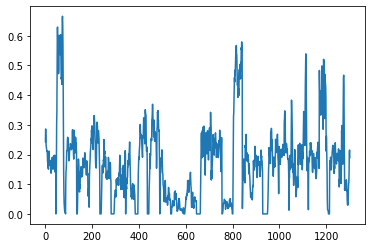

In [146]:
plt.plot(result_df['activity'])

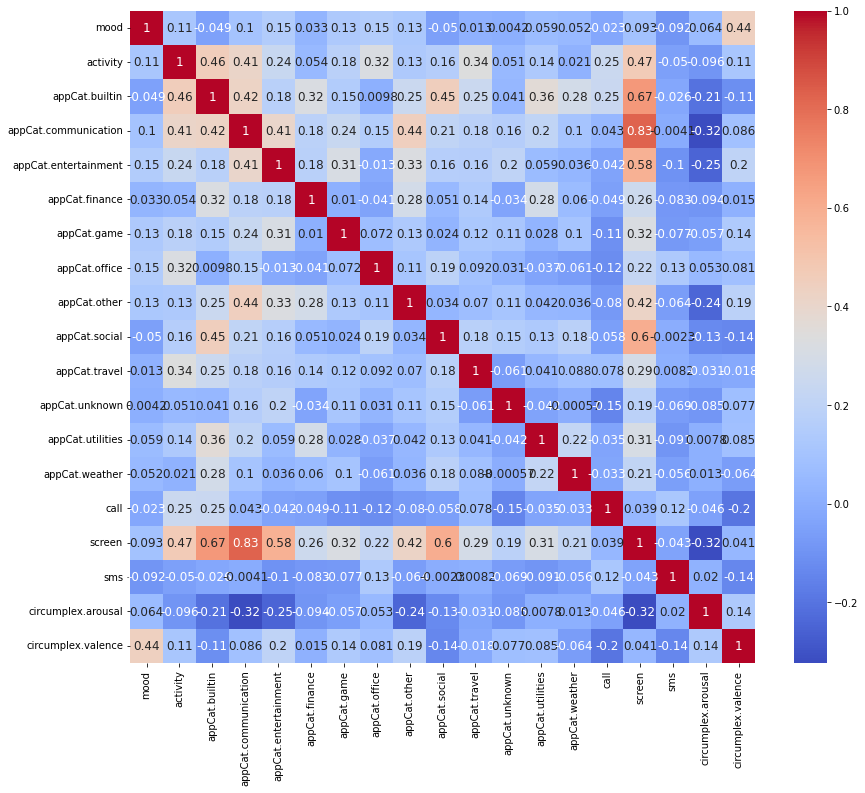

In [159]:
corr_matrix = result_df.corr()
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax, annot_kws={"size": 12})
plt.show()